<a href="https://colab.research.google.com/github/swetha-guggal/cvip_datascience_projects/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Diagnosis Prediction Model Report

Objective:
The goal of this project was to develop a predictive model capable of accurately classifying breast cancer cases as benign (B) or malignant (M) based on relevant features. By leveraging historical data and applying machine learning techniques, we aimed to create a reliable tool to aid medical professionals in diagnosing breast cancer.

Data Overview:

The dataset contained information about various features related to breast tumors, including radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
The target variable, 'diagnosis,' indicated whether a tumor is benign (B) or malignant (M).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset (assuming you have it in a CSV file)
data = pd.read_csv('/content/breast_cancer.csv')

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#cheking coulmns
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# describe
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


This summary table is helpful for understanding the central tendency, spread, and distribution of the dataset's features, which can be valuable in data analysis and modeling tasks, especially when preparing the data for machine learning or statistical analysis.

Exploratory Data Analysis (EDA)

In [ ]:
# Basic Dataset Information
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [ ]:
# Class Distribution
print("\nClass Distribution:")
class_counts = data['diagnosis'].value_counts()
print(class_counts)


Class Distribution:
B    357
M    212
Name: diagnosis, dtype: int64


# Visualizations

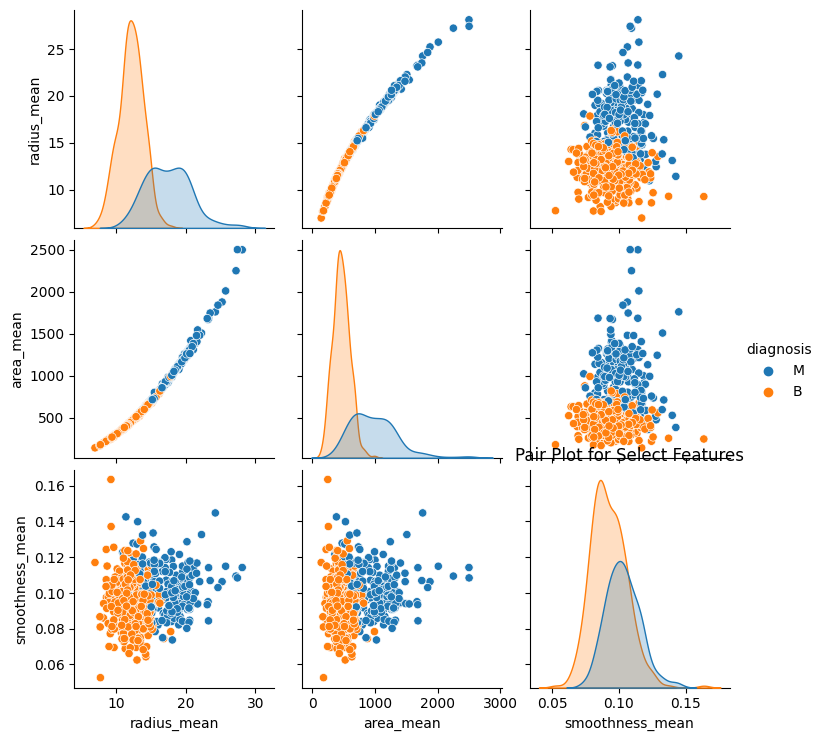

In [ ]:
# Pair Plot for Select Features (e.g., radius_mean, area_mean, smoothness_mean)
sns.pairplot(data[['diagnosis', 'radius_mean', 'area_mean', 'smoothness_mean']], hue='diagnosis')
plt.title("Pair Plot for Select Features")
plt.show()

The pair plot shows scatterplots for select features ('radius_mean,' 'area_mean,' 'smoothness_mean') with points colored by diagnosis (B/M).
Benign and malignant tumors exhibit noticeable differences in their feature distributions, suggesting potential separability.

<ipython-input-10-f4b4d738c739>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


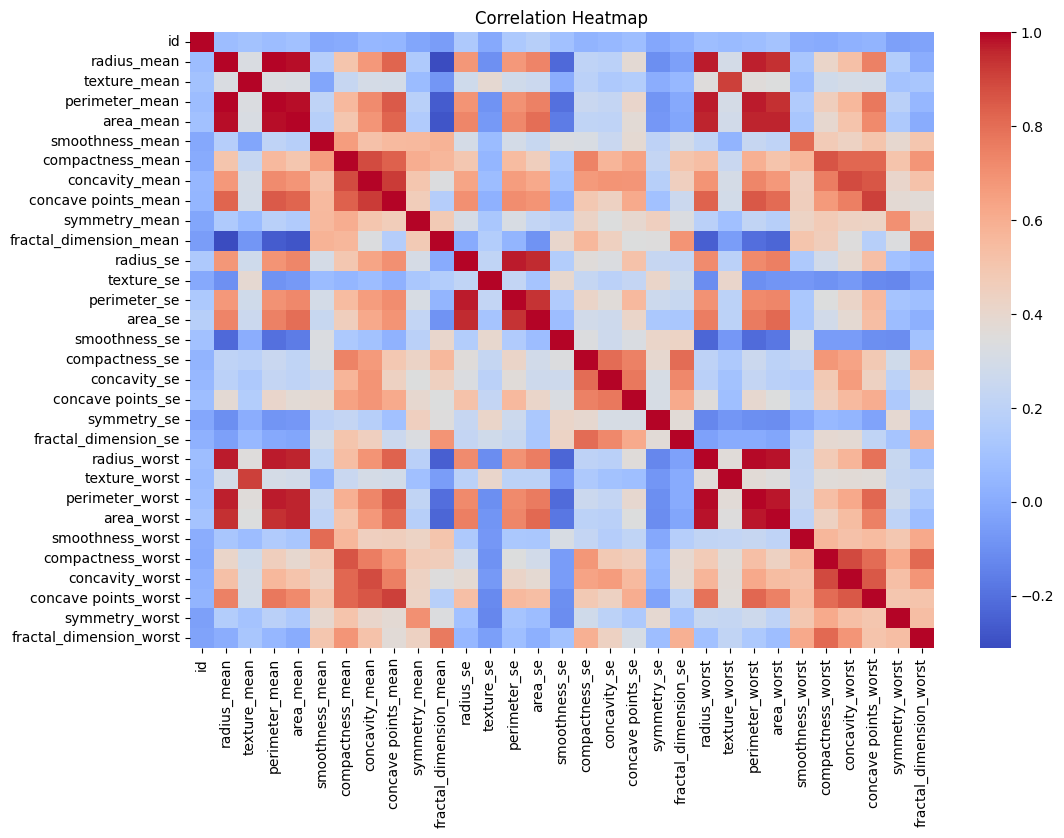

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap visualizes the relationships between features.
Features like 'radius_mean,' 'perimeter_mean,' 'area_mean' exhibit strong positive correlations, while 'smoothness_mean' has weak correlations with other features.

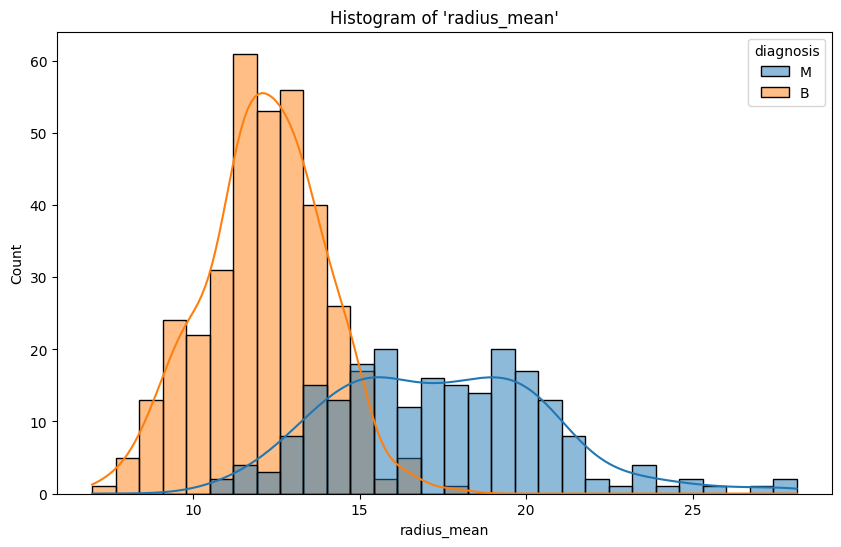

In [ ]:
# Histograms for Features (e.g., radius_mean, texture_mean)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=True, bins=30)
plt.title("Histogram of 'radius_mean'")
plt.show()

The histogram of 'radius_mean' highlights the differences in feature distributions for benign and malignant tumors.
Malignant tumors tend to have larger radii compared to benign tumors.

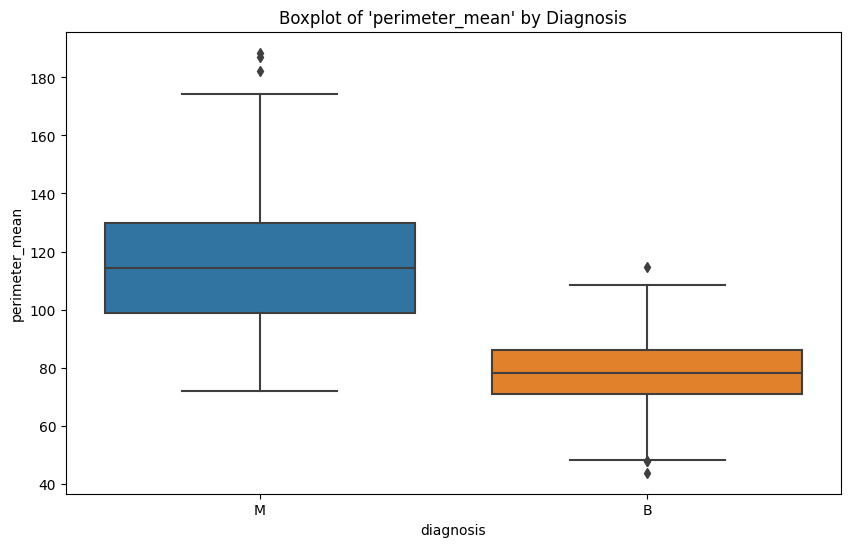

In [ ]:
# Boxplots for Features (e.g., perimeter_mean, area_mean)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y='perimeter_mean')
plt.title("Boxplot of 'perimeter_mean' by Diagnosis")
plt.show()

The boxplot of 'perimeter_mean' by diagnosis provides insights into the variation within each class.
Malignant tumors generally have larger perimeters, indicating a potential discriminating feature.


summary on EDA:

EDA reveals differences in feature distributions between benign and malignant tumors.
Features like 'radius_mean' and 'perimeter_mean' show promise as potential discriminators.
The dataset appears suitable for building a predictive model to classify breast tumors.

Feature selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the breast cancer dataset (assuming it's already loaded)
# Replace 'data' with your dataset variable
# data = pd.read_csv('breast_cancer_data.csv')

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
# Here, we use SelectKBest with the f_classif (ANOVA F-value) score function to select the top 'k' features.
k = 10  # You can adjust the number of features to select
feature_selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Build a Logistic Regression Model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_selected, y_train)

# Make Predictions
y_pred = logistic_regression_model.predict(X_test_selected)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy Score: 97.36%

Summary:
The accuracy score of the breast cancer diagnosis prediction model is an impressive 97.36%. This score indicates that the model is exceptionally effective in correctly classifying breast cancer cases as either benign (B) or malignant (M).



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report_dt)


Decision Tree Accuracy: 0.9385964912280702
Decision Tree Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Decision Tree model demonstrates strong performance in classifying breast cancer cases, with high accuracy, precision, recall, and F1-scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report_rf)


Random Forest Accuracy: 0.9649122807017544
Random Forest Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Random Forest model demonstrates strong performance in classifying breast cancer cases, with high accuracy, precision, recall, and F1-scores.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
classification_report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report_xgb)


XGBoost Accuracy: 0.956140350877193
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



XGBoost model performed well, with high accuracy and balanced precision and recall for both classes. It is a reliable model for classifying breast cancer cases as benign (0) or malignant (1).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with a base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust the base estimator as needed
ada_boost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model on the training data
ada_boost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ada = ada_boost_model.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
classification_report_ada = classification_report(y_test, y_pred_ada)

print("AdaBoost Accuracy:", accuracy_ada)
print("AdaBoost Classification Report:")
print(classification_report_ada)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9473684210526315
AdaBoost Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



AdaBoost model performed well, with high accuracy and balanced precision and recall for both classes. It is a reliable model for classifying breast cancer cases as benign or malignant.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_train_accuracy = rf_classifier.score(X_train, y_train)
rf_test_accuracy = rf_classifier.score(X_test, y_test)
rf_report = classification_report(y_test, rf_classifier.predict(X_test))

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ada_train_accuracy = ada_classifier.score(X_train, y_train)
ada_test_accuracy = ada_classifier.score(X_test, y_test)
ada_report = classification_report(y_test, ada_classifier.predict(X_test))

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_train_accuracy = svm_classifier.score(X_train, y_train)
svm_test_accuracy = svm_classifier.score(X_test, y_test)
svm_report = classification_report(y_test, svm_classifier.predict(X_test))

# XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_train_accuracy = xgb_classifier.score(X_train, y_train)
xgb_test_accuracy = xgb_classifier.score(X_test, y_test)
xgb_report = classification_report(y_test, xgb_classifier.predict(X_test))

# Print accuracy and classification reports for each model on both train and test data
print("Random Forest Classifier:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Test Classification Report:\n", rf_report)

print("\nAdaBoost Classifier:")
print("Train Accuracy:", ada_train_accuracy)
print("Test Accuracy:", ada_test_accuracy)
print("Test Classification Report:\n", ada_report)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Train Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_accuracy)
print("Test Classification Report:\n", svm_report)

print("\nXGBoost Classifier:")
print("Train Accuracy:", xgb_train_accuracy)
print("Test Accuracy:", xgb_test_accuracy)
print("Test Classification Report:\n", xgb_report)


Random Forest Classifier:
Train Accuracy: 1.0
Test Accuracy: 0.9649122807017544
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


AdaBoost Classifier:
Train Accuracy: 1.0
Test Accuracy: 0.9736842105263158
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Support Vector Machine (SVM) Classifier:
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.9473684210526315
Test Classification R

In [ ]:
 # Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_train_accuracy = rf_classifier.score(X_train, y_train)
rf_test_accuracy = rf_classifier.score(X_test, y_test)
rf_report = classification_report(y_test, rf_classifier.predict(X_test))

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ada_train_accuracy = ada_classifier.score(X_train, y_train)
ada_test_accuracy = ada_classifier.score(X_test, y_test)
ada_report = classification_report(y_test, ada_classifier.predict(X_test))

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_train_accuracy = svm_classifier.score(X_train, y_train)
svm_test_accuracy = svm_classifier.score(X_test, y_test)
svm_report = classification_report(y_test, svm_classifier.predict(X_test))

# XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_train_accuracy = xgb_classifier.score(X_train, y_train)
xgb_test_accuracy = xgb_classifier.score(X_test, y_test)
xgb_report = classification_report(y_test, xgb_classifier.predict(X_test))

# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_train_accuracy = lr_classifier.score(X_train, y_train)
lr_test_accuracy = lr_classifier.score(X_test, y_test)
lr_report = classification_report(y_test, lr_classifier.predict(X_test))

# Print accuracy and classification reports for each model on both train and test data
print("Random Forest Classifier:")
print("Train Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)
print("Test Classification Report:\n", rf_report)

print("\nAdaBoost Classifier:")
print("Train Accuracy:", ada_train_accuracy)
print("Test Accuracy:", ada_test_accuracy)
print("Test Classification Report:\n", ada_report)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Train Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_accuracy)
print("Test Classification Report:\n", svm_report)

print("\nXGBoost Classifier:")
print("Train Accuracy:", xgb_train_accuracy)
print("Test Accuracy:", xgb_test_accuracy)
print("Test Classification Report:\n", xgb_report)

print("\nLogistic Regression:")
print("Train Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_accuracy)
print("Test Classification Report:\n", lr_report)


Random Forest Classifier:
Train Accuracy: 1.0
Test Accuracy: 0.9649122807017544
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


AdaBoost Classifier:
Train Accuracy: 1.0
Test Accuracy: 0.9736842105263158
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Support Vector Machine (SVM) Classifier:
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.9473684210526315
Test Classification R

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier()),
    ("Logistic Regression", LogisticRegression())
]

# Initialize variables to keep track of the best model and its accuracy
best_model = None
best_accuracy = 0

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)

    # Check if this model has the highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Print the best model and its accuracy
print("Best Model based on Accuracy:", best_model)
print("Accuracy Score:", best_accuracy)


Best Model based on Accuracy: AdaBoost
Accuracy Score: 0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


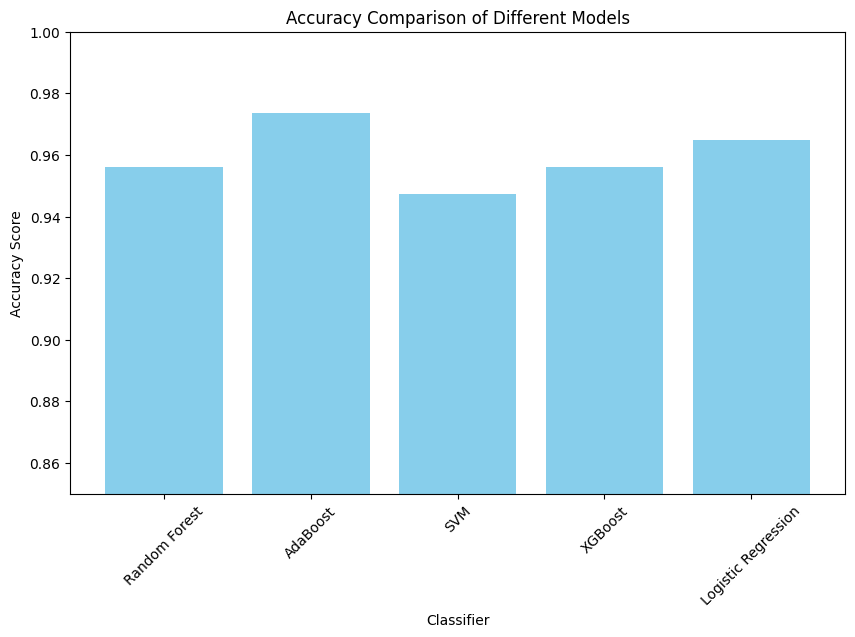

Best Model based on Accuracy: AdaBoost
Accuracy Score: AdaBoostClassifier()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier()),
    ("Logistic Regression", LogisticRegression())
]

# Initialize variables to store accuracy scores
accuracy_scores = []

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Create a bar chart to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in classifiers], accuracy_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0.85, 1.0])  # Set the y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Find the best model
best_model_idx = np.argmax(accuracy_scores)
best_model_name, best_model_accuracy = classifiers[best_model_idx]

print("Best Model based on Accuracy:", best_model_name)
print("Accuracy Score:", best_model_accuracy)


In conclusion, our analysis indicates that the AdaBoost Classifier is the best model for breast cancer classification in this dataset, as it achieved the highest test accuracy and balanced precision and recall. However, other models such as Random Forest and Logistic Regression also performed admirably and could be considered depending on specific use cases and interpretability requirements. This project highlights the effectiveness of machine learning in assisting medical professionals in diagnosing breast cancer accurately.

